<a href="https://colab.research.google.com/github/RP-7/Credit-Risk-Modelling---PD/blob/main/Credit_Risk_Modelling_PD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Understanding the training dataset

In [23]:
import pandas as pd

df = pd.read_csv("application_train.csv") #df stands for data frame.

#Understanding the training data

df.shape # 307511 rows , 122 coloumns
df.head(5)
#df.info()
#df.describe()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

Understanding Target Distribution

In [20]:
df['TARGET'].value_counts(normalize=True)

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

Checking for missing data

In [26]:

df.isnull().sum().sort_values(ascending=False)
df.isnull().mean().sort_values(ascending=False)

COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
COMMONAREA_MEDI             0.698723
NONLIVINGAPARTMENTS_MEDI    0.694330
NONLIVINGAPARTMENTS_MODE    0.694330
                              ...   
FLAG_DOCUMENT_16            0.000000
FLAG_DOCUMENT_15            0.000000
FLAG_DOCUMENT_14            0.000000
FLAG_DOCUMENT_20            0.000000
FLAG_DOCUMENT_21            0.000000
Length: 122, dtype: float64

Correlations: Use correlation matrices to identify relationships between numeric variables. Highly correlated features may need to be handled to avoid multicollinearity.

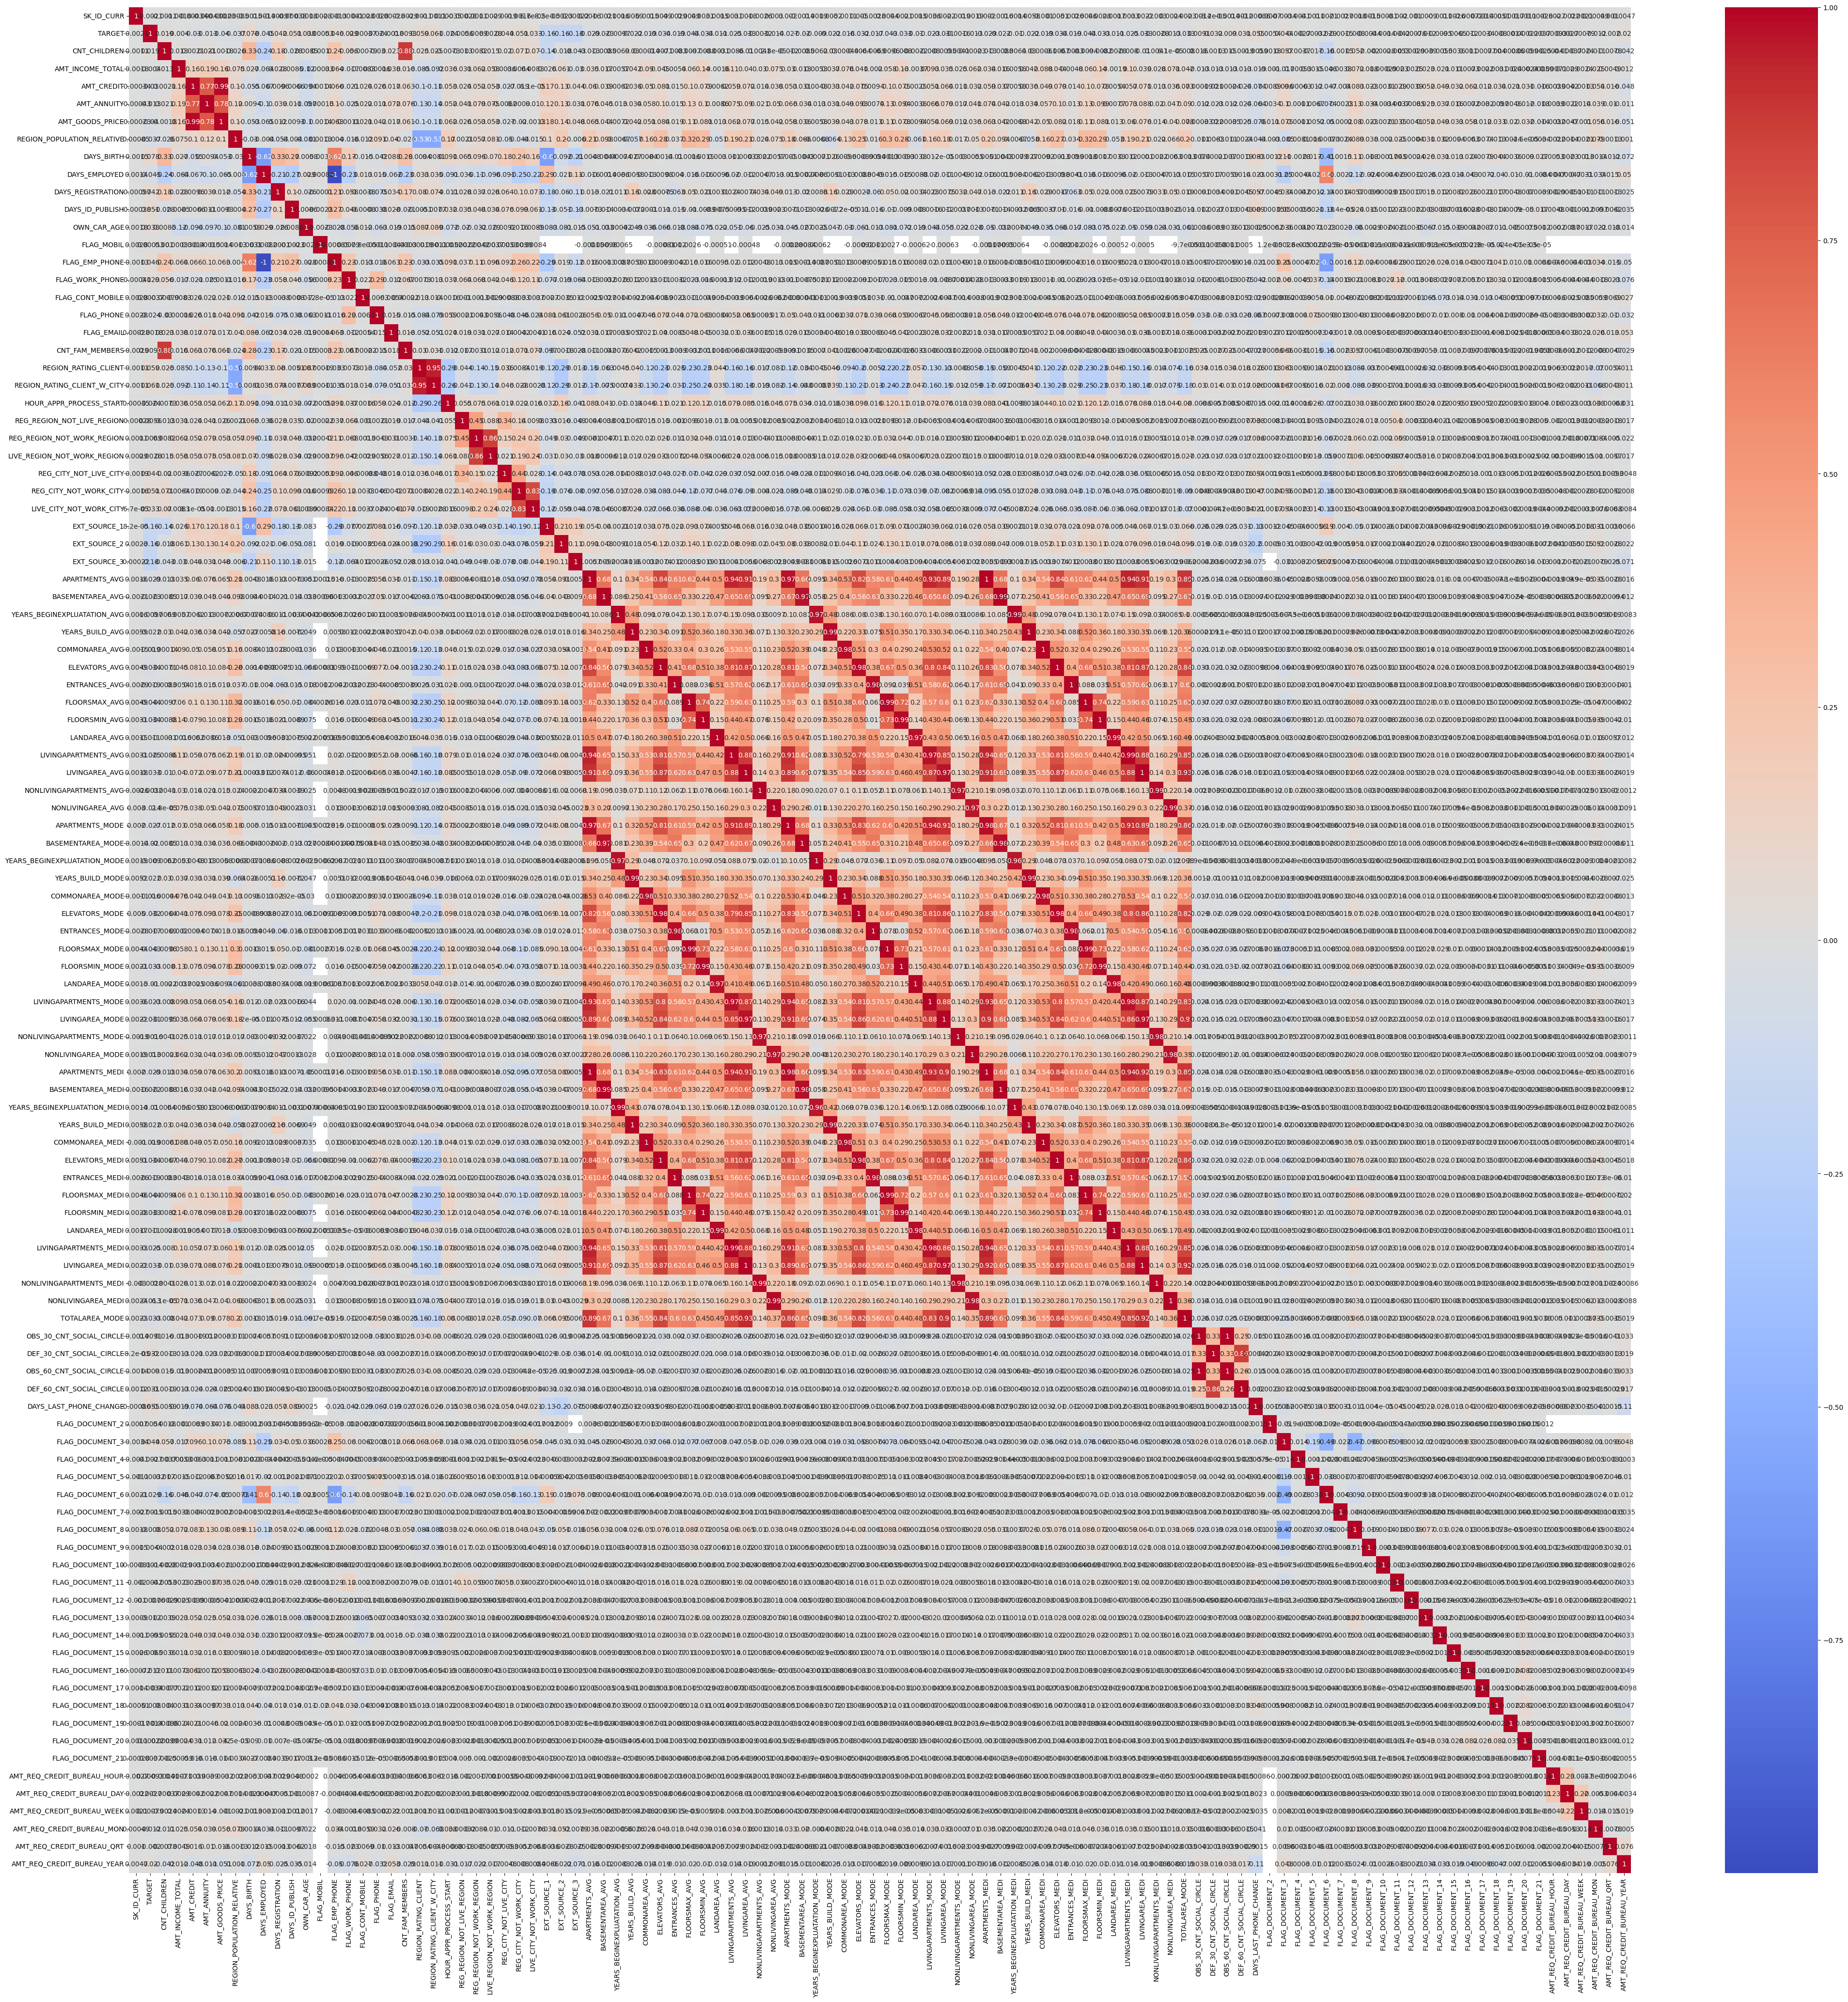

In [34]:
import seaborn as sns      #for statistical data visulisation (builds on top of matplotlib)
import matplotlib.pyplot as plt     # for data visulaistion




# PERFORM ONE HOT ENCODING IN CASE IF YOU WANT TO PERFORM CORRELATION WITH CATEGORICAL FEATURES TOO
# df = pd.get_dummies(df, columns=['Cash loans'], drop_first=True)




numeric_df = df.select_dtypes(include=[float, int])         # taking only numerical values into account
correlation_matrix = numeric_df.corr()      # correlation matrix for each combination
plt.figure(figsize=(50,50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')      # heatmap with annotation (annotated with correlation numbers)
                        # coolwarm - negative correlations are coloured in blue and positive ones in red.
plt.show()